# Importing data

In [33]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Import excel sheet and assign each sheet to different dataframes

file_path = 'Regional Sales Summary.xlsx'
sales_orders_df = pd.read_excel(file_path, sheet_name='Sales Orders')
customers_df = pd.read_excel(file_path, sheet_name='Customers')
regions_df = pd.read_excel(file_path, sheet_name='Regions')
state_regions_df = pd.read_excel(file_path, sheet_name='State Regions')
products_df = pd.read_excel(file_path, sheet_name='Products')
budgets_df = pd.read_excel(file_path, sheet_name='2017 Budgets')

# Initial Data Inspection

In [35]:
# Get an overview of all of the dataframes
display(sales_orders_df.head())
print()


display(customers_df.head())
print()


display(regions_df.head())
print()


display(state_regions_df.head())
print()


display(products_df.head())
print()


display(budgets_df.head())

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Gross Profit
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,13170.257
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,24598.782
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,5184.460
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,15339.248
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,17070.930


,Customer Index,Customer Names
0,171,Accord Group
1,82,Accudial Company
2,156,Actavis Company
3,100,Aibox Company
4,90,Aimbo Corp


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,433,New Trier,Cook County,IL,Illinois,Township,42.10140,-87.74493,847,56499,19314,149837,41189481,826348,America/Chicago
1,972,Sammamish,King County,WA,Washington,City,47.64177,-122.08040,425,52253,16201,147349,52767496,9323112,America/Los Angeles
2,567,Bethesda,Montgomery County,MD,Maryland,CDP,38.98067,-77.10026,301,62024,25007,144772,34323492,194871,America/New York
3,70,Cupertino,Santa Clara County,CA,California,City,37.32300,-122.03218,408,60572,20422,141953,29295950,2520,America/Los Angeles
4,147,Palo Alto,Santa Clara County,CA,California,City,37.44188,-122.14302,650,66853,26087,136519,61810463,4940290,America/Los Angeles


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


Gross Profit calculated in excel sheet
df['gross profit'] = df['revenue'] - df['total_cost']

# Merge Dataframes together

In [36]:
# Step 1: Merge Sales Orders with Customers
merged_df = pd.merge(
    sales_orders_df,
    customers_df,
    how="outer",
    left_on="Customer Name Index",
    right_on="Customer Index"
)

# Step 2: Merge with Regions
merged_df = pd.merge(
    merged_df,
    regions_df,
    how="left",
    left_on="Delivery Region Index",
    right_on="id"
)

# Step 3: Merge with Products
merged_df = pd.merge(
    merged_df,
    products_df,
    how="left",
    left_on="Product Description Index",
    right_on="Index"
)

# Step 4: Merge with 2017 Budgets
merged_df = pd.merge(
    merged_df,
    budgets_df,
    how="left",
    left_on="Product Name",
    right_on="Product Name"
)

# Step 5: Merge with State Regions
merged_df = pd.merge(
    merged_df,
    state_regions_df,
    how="left",
    left_on="state_code",
    right_on="State Code"
)

In [37]:
# Inspect the newly merged table

merged_df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,median_income,land_area,water_area,time_zone,Index,Product Name,2017 Budgets,State Code,State,Region
0,SO - 0001878,2014-01-11,1,Distributor,USD,NXH382,767,28,6,1835.8,...,34299,110000000,40000000,America/New York,28,Product 28,1003867.767,NY,New York,Northeast
1,SO - 0006559,2014-01-11,1,Wholesale,USD,AXW291,74,17,8,1118.9,...,89221,38539601,13084,America/Los Angeles,17,Product 17,2119616.824,CA,California,West
2,SO - 0008258,2014-01-13,1,Wholesale,USD,AXW291,423,26,12,3095.4,...,53593,51603321,0,America/Chicago,26,Product 26,5685138.270,IL,Illinois,Midwest
3,SO - 0003374,2014-01-28,1,Wholesale,USD,FLR025,155,26,6,1132.3,...,124759,62489257,386195,America/Los Angeles,26,Product 26,5685138.270,CA,California,West
4,SO - 000161,2014-02-06,1,Distributor,USD,AXW291,589,24,8,3477.3,...,24862,86496836,1713490,America/Detroit,24,Product 24,756557.970,MI,Michigan,Midwest


# Data Cleaning

In [38]:
#Drop the irrelavant columns and save to the original df

merged_df.drop(columns=['Currency Code',
                        'Warehouse Code',
                        'Customer Index',
                        'land_area',
                        'water_area',
                        'time_zone',
                        'Delivery Region Index',
                        'id',
                        'Index',
                        'State Code',
                        'state',
                        'state_code',
                        'Product Description Index',
                        'Customer Name Index',
                        'population',
                        'households',
                        'name',
                        'county'],
               inplace=True)

In [39]:
# Convert all column names to lowercase for consistency throughout the dataframe
merged_df.columns = merged_df.columns.str.lower()

# Display the new merged dataframe
merged_df.head(5)

,ordernumber,orderdate,channel,order quantity,unit price,line total,total unit cost,gross profit,customer names,type,latitude,longitude,area_code,median_income,product name,2017 budgets,state,region
0,SO - 0001878,2014-01-11,Distributor,6,1835.8,11014.8,1083.122,9931.678,Geiss Company,Borough,40.83722,-73.88611,347,34299,Product 28,1003867.767,New York,Northeast
1,SO - 0006559,2014-01-11,Wholesale,8,1118.9,8951.2,615.395,8335.805,Geiss Company,City,34.02862,-117.81034,909,89221,Product 17,2119616.824,California,West
2,SO - 0008258,2014-01-13,Wholesale,12,3095.4,37144.8,2073.918,35070.882,Geiss Company,Township,41.93807,-87.86850,847,53593,Product 26,5685138.270,Illinois,Midwest
3,SO - 0003374,2014-01-28,Wholesale,6,1132.3,6793.8,532.181,6261.619,Geiss Company,City,37.66243,-121.87468,925,124759,Product 26,5685138.270,California,West
4,SO - 000161,2014-02-06,Distributor,8,3477.3,27818.4,1390.920,26427.480,Geiss Company,City,43.01253,-83.68746,810,24862,Product 24,756557.970,Michigan,Midwest


In [40]:
# Check and drop any duplicates
merged_df.drop_duplicates(inplace=True)

# Remove any spaces before and after in the Channel column, making sure every Warehouse is "Warehouse" and not "Warehouse "
merged_df['channel'] = merged_df['channel'].str.strip()
# sales_orders_df['Channel'] so that the changes are only saved to this column in the original dataframe


In [41]:
# Feature Engineering
# Add additional columns: Gross Margin %, and bin dates into months and years for easier interpretation
merged_df['Gross Margin %/product'] = merged_df['gross profit'] / merged_df['line total'] * 100
merged_df['Order Year'] = merged_df['orderdate'].dt.year
merged_df['Order Month Name'] = merged_df['orderdate'].dt.month_name()

# Drop the 'OrderDate' because it is now redundant, but save this new table to a new df
new_sales_orders_df = sales_orders_df.drop('OrderDate', axis=1)

merged_df.columns = merged_df.columns.str.lower()

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ordernumber             64104 non-null  object        
 1   orderdate               64104 non-null  datetime64[ns]
 2   channel                 64104 non-null  object        
 3   order quantity          64104 non-null  int64         
 4   unit price              64104 non-null  float64       
 5   line total              64104 non-null  float64       
 6   total unit cost         64104 non-null  float64       
 7   gross profit            64104 non-null  float64       
 8   customer names          64104 non-null  object        
 9   type                    64104 non-null  object        
 10  latitude                64104 non-null  float64       
 11  longitude               64104 non-null  float64       
 12  area_code               64104 non-null  int64 

In [43]:
# Check for missing values in each column of the dataset
merged_df.isnull().sum()

,0
ordernumber,0
orderdate,0
channel,0
order quantity,0
unit price,0
line total,0
total unit cost,0
gross profit,0
customer names,0
type,0


In [44]:
merged_df.head(5)

,ordernumber,orderdate,channel,order quantity,unit price,line total,total unit cost,gross profit,customer names,type,...,longitude,area_code,median_income,product name,2017 budgets,state,region,gross margin %/product,order year,order month name
0,SO - 0001878,2014-01-11,Distributor,6,1835.8,11014.8,1083.122,9931.678,Geiss Company,Borough,...,-73.88611,347,34299,Product 28,1003867.767,New York,Northeast,90.166667,2014,January
1,SO - 0006559,2014-01-11,Wholesale,8,1118.9,8951.2,615.395,8335.805,Geiss Company,City,...,-117.81034,909,89221,Product 17,2119616.824,California,West,93.125000,2014,January
2,SO - 0008258,2014-01-13,Wholesale,12,3095.4,37144.8,2073.918,35070.882,Geiss Company,Township,...,-87.86850,847,53593,Product 26,5685138.270,Illinois,Midwest,94.416667,2014,January
3,SO - 0003374,2014-01-28,Wholesale,6,1132.3,6793.8,532.181,6261.619,Geiss Company,City,...,-121.87468,925,124759,Product 26,5685138.270,California,West,92.166667,2014,January
4,SO - 000161,2014-02-06,Distributor,8,3477.3,27818.4,1390.920,26427.480,Geiss Company,City,...,-83.68746,810,24862,Product 24,756557.970,Michigan,Midwest,95.000000,2014,February


# Exploratory Data Analysis (EDA)

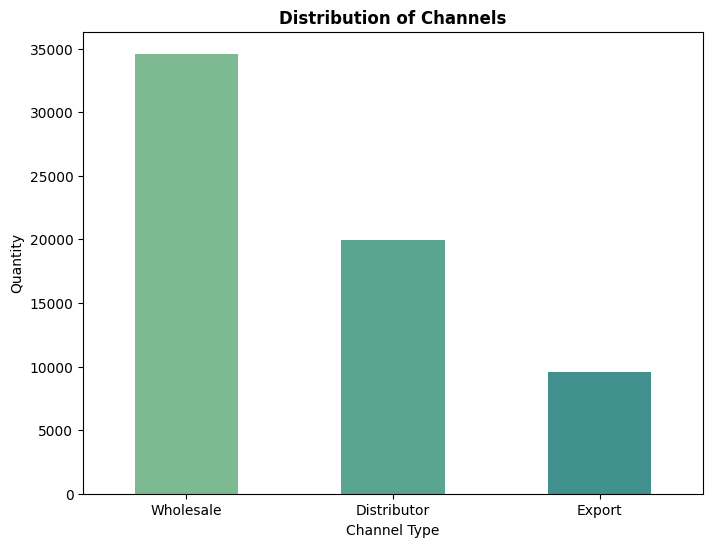

In [45]:
# Distribution of channels

plt.figure(figsize=(8,6))
merged_df['channel'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Distribution of Channels', fontweight='bold')
plt.xlabel('Channel Type')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()

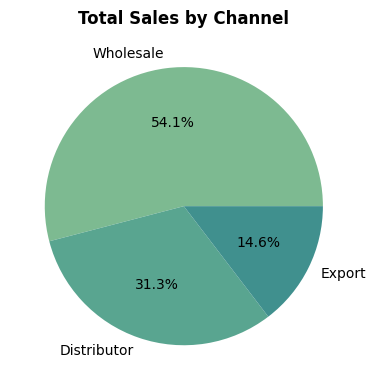

In [46]:
# Line Total grouped by Channel to get the Revenue per Channel

channel_sales = merged_df.groupby('channel')['line total'].sum().sort_values(ascending=False)

# Make the Piechart
plt.figure(figsize=(4, 4))
plt.pie(
    channel_sales.values,
    labels=channel_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('crest'))
plt.title('Total Sales by Channel', fontweight ='bold')
plt.tight_layout()

plt.show()

In [47]:
merged_df['state']

,state
0,New York
1,California
2,Illinois
3,California
4,Michigan
...,...
64099,Minnesota
64100,New Jersey
64101,Pennsylvania
64102,Texas


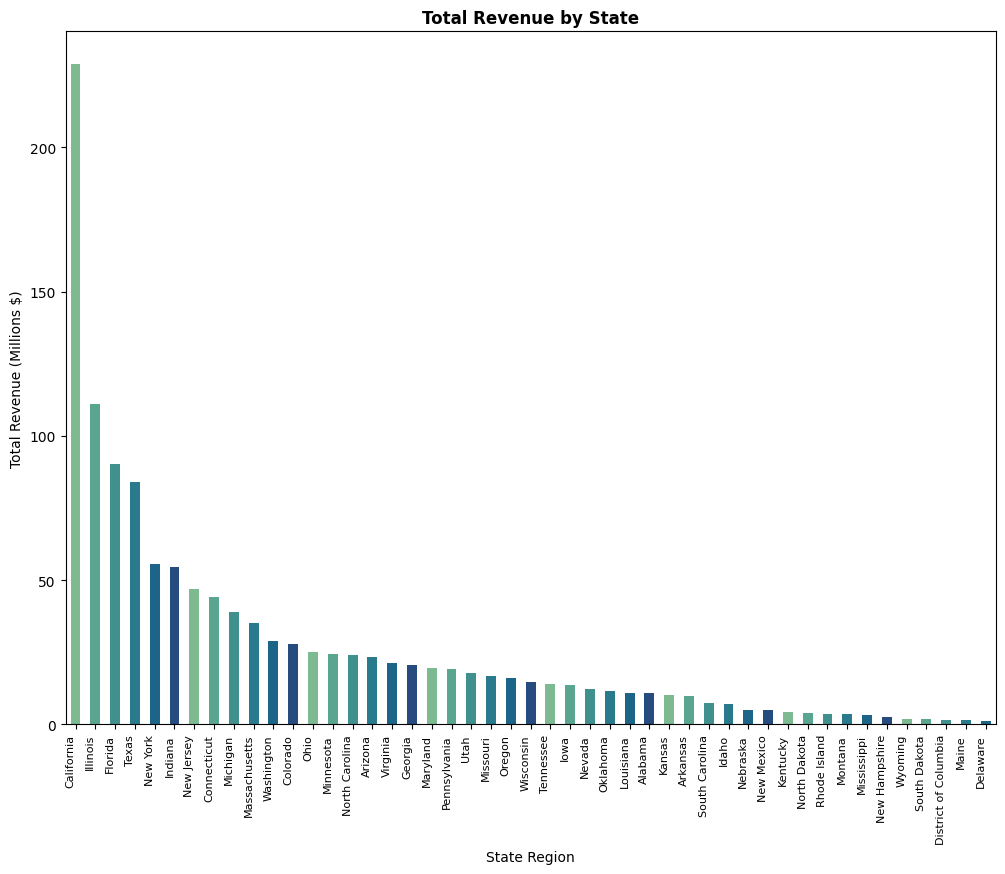

In [65]:
# Distribution of Customers by Revenue across USA
states_sales = merged_df.groupby('state')['line total'].sum().sort_values(ascending=False) /1e6
    # Divide by '1e6' the ylabel axis can be in the millions

# Graph the bar plot
plt.figure(figsize=(12,9))
states_sales.plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Total Revenue by State', fontweight ='bold')
plt.xlabel('State Region')
plt.ylabel('Total Revenue (Millions $)')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=8)

plt.show()

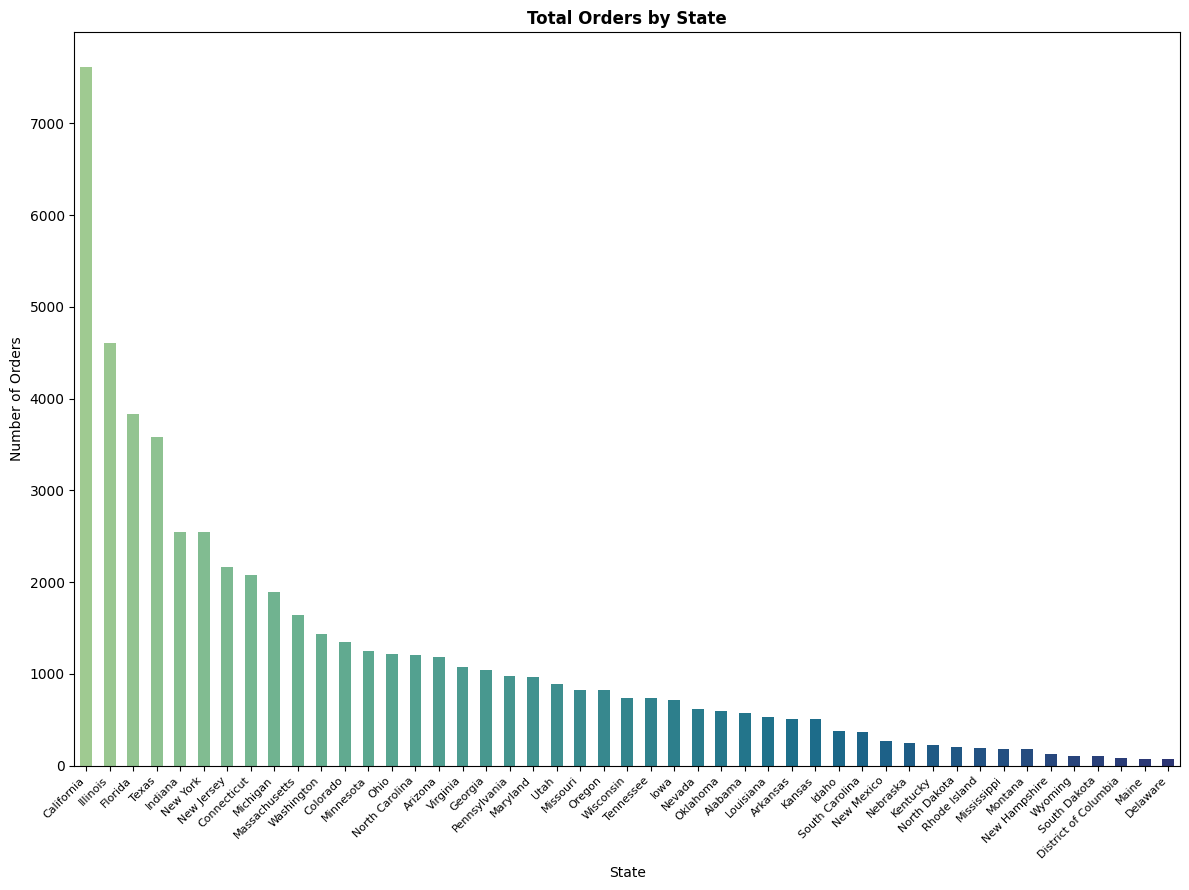

In [62]:
# Total Order Count per State

states_sales = merged_df.groupby('state')['ordernumber'].nunique().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 9))
states_sales.plot(kind='bar', color=sns.color_palette('crest', n_colors=len(states_sales))) # This ensures the palette generates enough distinct colors for all bars
plt.title('Total Orders by State', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

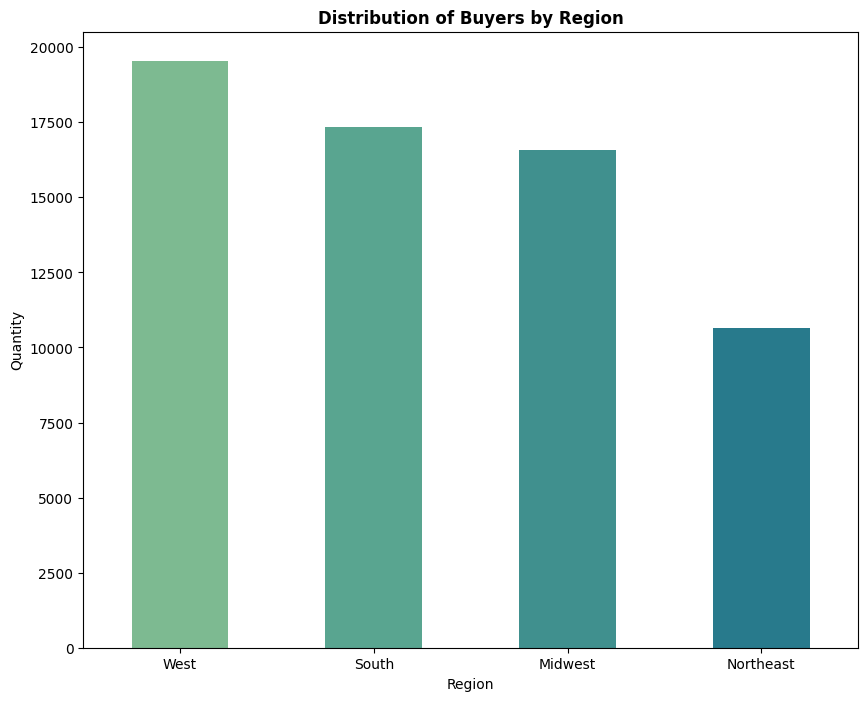

In [50]:
# Distribution of Customers by Region

plt.figure(figsize=(10,8))
merged_df['region'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Distribution of Buyers by Region', fontweight ='bold')
plt.ylabel('Quantity')
plt.xlabel('Region')
plt.xticks(rotation=0)

plt.show()

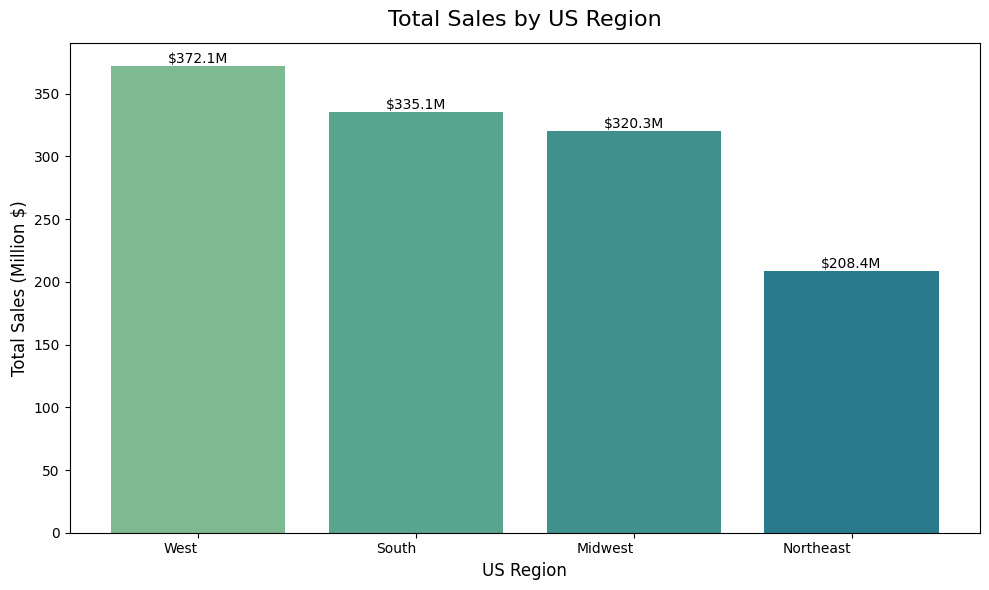

In [51]:
region_sales = (merged_df.groupby('region')['line total'].sum()
    .sort_values(ascending=False) / 1e6)

# Plot using matplotlib directly
plt.figure(figsize=(10, 6))
bars = plt.bar(region_sales.index, region_sales.values, color=sns.color_palette('crest'))

# Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('US Region', fontsize=12)
plt.ylabel('Total Sales (Million $)', fontsize=12)
plt.xticks(rotation=0, ha='right')

# Add value labels on top of bars
for bar, value in zip(bars, region_sales.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'${value:.1f}M', ha='center', va='bottom', fontweight='normal')

plt.tight_layout()
plt.show()

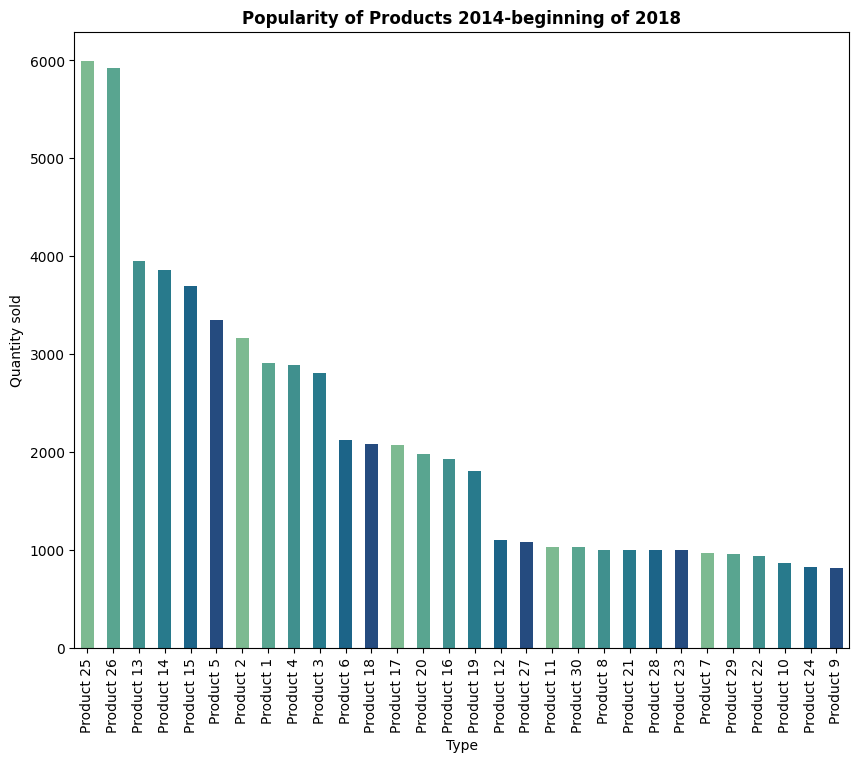

In [52]:
# Popularity of Products (2014-Beginning of 2018)

plt.figure(figsize=(10,8))
merged_df['product name'].value_counts().plot(kind='bar', color=sns.color_palette('crest'))
plt.title('Popularity of Products 2014-beginning of 2018', fontweight ='bold')
plt.ylabel('Quantity sold')
plt.xlabel('Type')
plt.xticks(rotation=90)

plt.show()

/tmp/ipython-input-3206699484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


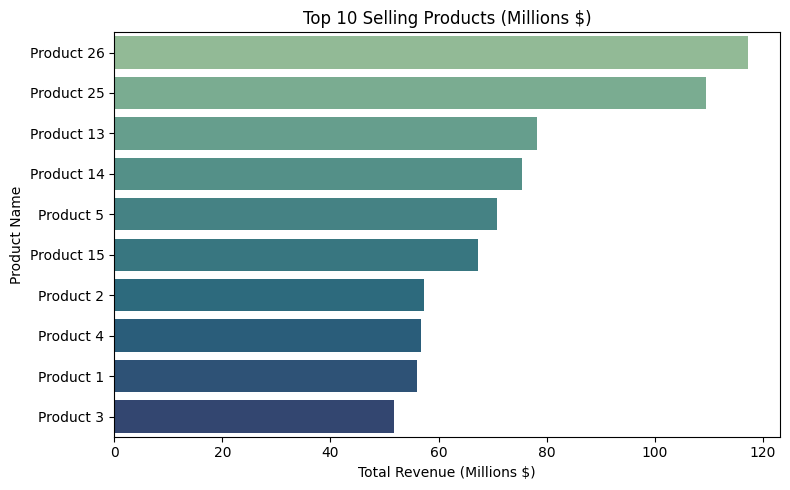

In [67]:
# Display the Top 10 Products in terms of revenue

top_products = merged_df.groupby('product name')['line total'].sum() / 1e6
top_products = top_products.nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette='crest')

plt.title('Top 10 Selling Products (Millions $)')
plt.xlabel('Total Revenue (Millions $)')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2800865587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


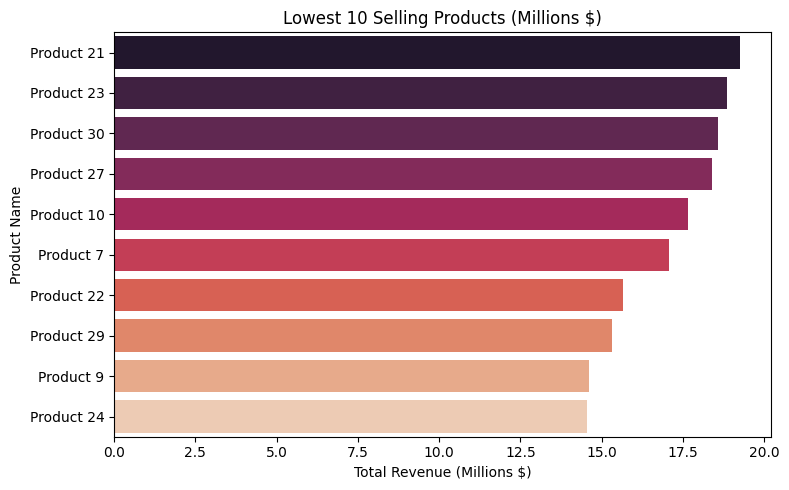

In [54]:
# Display the Lowest 10 Products in terms of revenue

lowest_products = merged_df.groupby('product name')['line total'].sum() / 1e6
lowest_products = lowest_products.nsmallest(10).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=lowest_products.values,
    y=lowest_products.index,
    palette='rocket')

plt.title('Lowest 10 Selling Products (Millions $)')
plt.xlabel('Total Revenue (Millions $)')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()

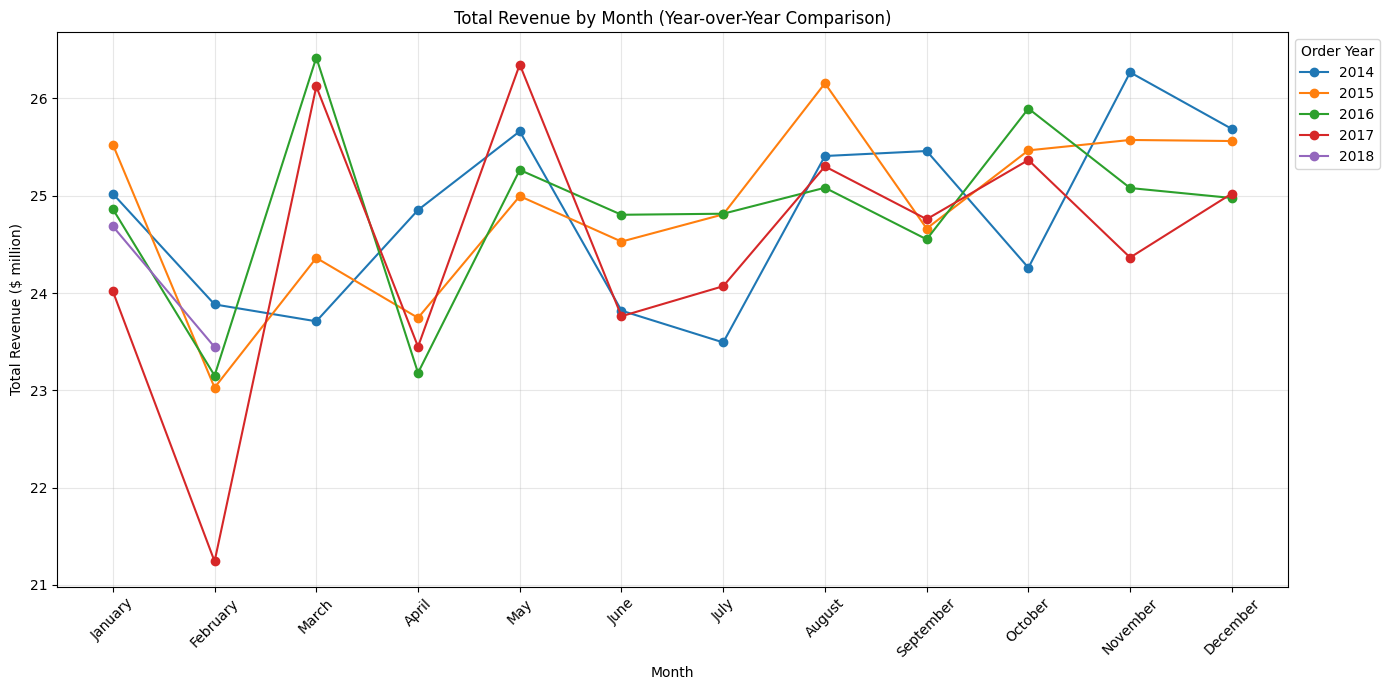

In [75]:
seasonal_summary = merged_df.groupby(['order year', 'order month name'])['line total'].agg(['sum', 'count']).reset_index()
seasonal_summary['order month name'] = pd.Categorical(seasonal_summary['order month name'],
                                                     categories=['January', 'February', 'March', 'April', 'May',
                                                                 'June','July', 'August', 'September',
                                                                 'October', 'November', 'December'],
                                                     ordered=True)
seasonal_summary = seasonal_summary.sort_values(['order year', 'order month name'])

plt.figure(figsize=(14, 7))
for year in seasonal_summary['order year'].unique():
    year_data = seasonal_summary[seasonal_summary['order year'] == year]
    plt.plot(year_data['order month name'], year_data['sum'] / 1e6, marker='o', label=year)

plt.title('Total Revenue by Month (Year-over-Year Comparison)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($ million)')
plt.legend(title='Order Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


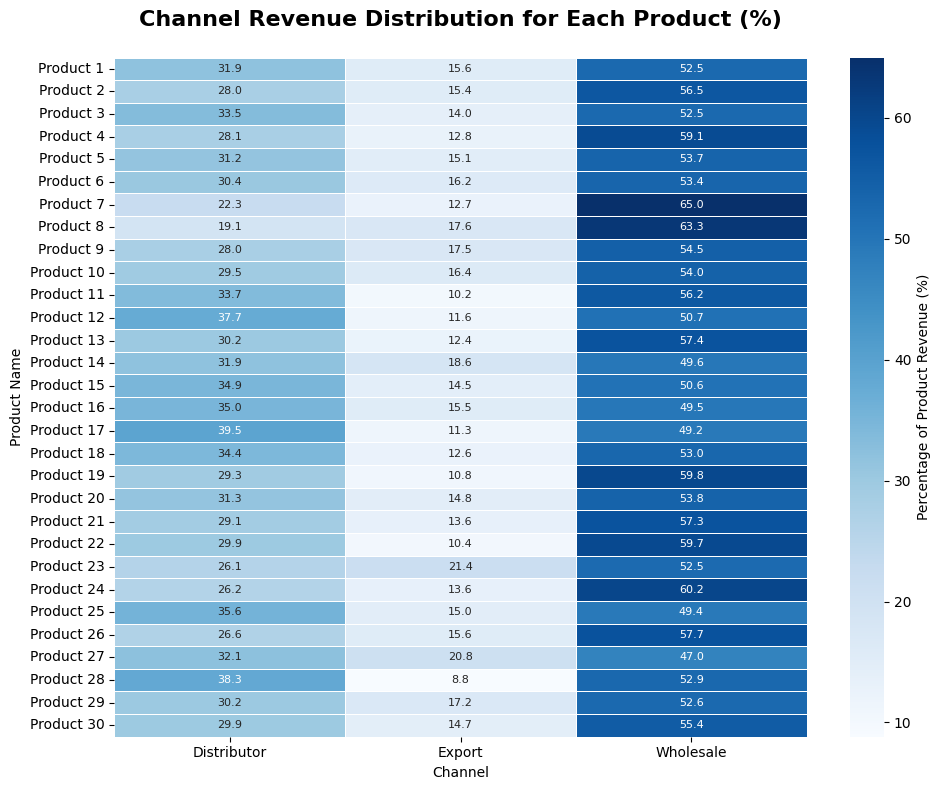

In [72]:
# Create a crosstab: Count of orders (or sum of revenue) for each Product-Channel combination
channel_distribution_count = pd.crosstab(
    index=merged_df['product name'],
    columns=merged_df['channel'],
    values=merged_df['gross profit'],
    aggfunc='sum',
    margins=True,
    margins_name='Total'
).fillna(0)

# Calculate the percentage distribution for each product (across rows)
channel_distribution_pct = pd.crosstab(
    index=merged_df['product name'],
    columns=merged_df['channel'],
    values=merged_df['gross profit'],
    aggfunc='sum',
    normalize='index'  # This calculates the percentage per product (row)
).fillna(0).round(4) * 100  # Convert to percentage and round

from natsort import natsorted

channel_distribution_pct_sorted = channel_distribution_pct.reindex(
    index=natsorted(channel_distribution_pct.index))

plt.figure(figsize=(10, 8))
sns.heatmap(channel_distribution_pct_sorted,
            annot=True,
            fmt='.1f',
            cmap='Blues',
            cbar_kws={'label': 'Percentage of Product Revenue (%)'},
            linewidths=0.5,
            annot_kws={'size': 8})

plt.title('Channel Revenue Distribution for Each Product (%)\n',
          fontsize=16, fontweight='bold')
plt.xlabel('Channel')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

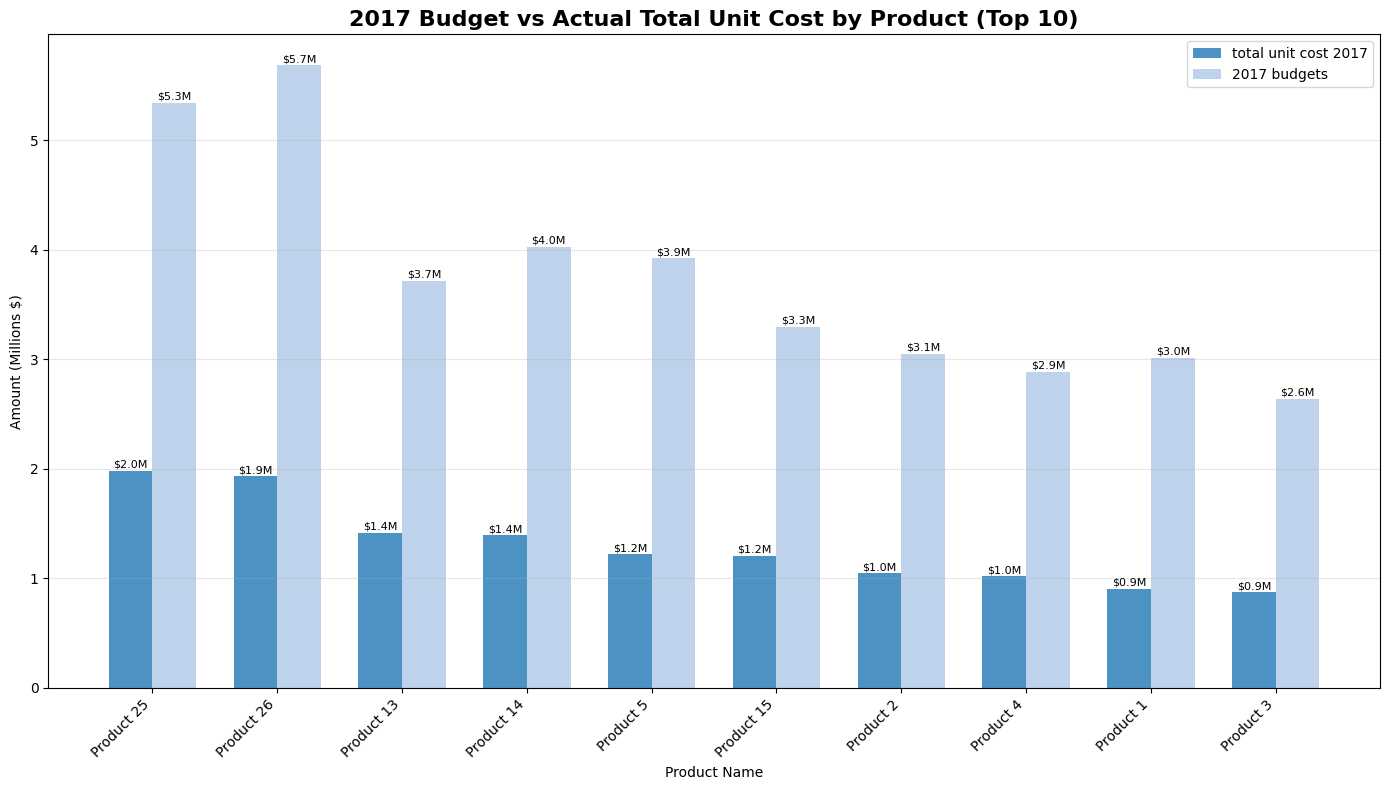

In [71]:
# Filter for 2017 data
df_2017 = merged_df[merged_df['order year'] == 2017]

# Group by product and aggregate
budget_vs_cost = df_2017.groupby('product name').agg({
    'total unit cost': 'sum',
    '2017 budgets': 'first'  # Assuming budget is consistent per product
}).reset_index()


# Sort by total unit cost (descending)
budget_vs_cost = budget_vs_cost.sort_values('total unit cost', ascending=False)

# Get top 15 products for better visualization
top_products = budget_vs_cost.head(10)

plt.figure(figsize=(14, 8))
x = np.arange(len(top_products))
width = 0.35

# Create bars
bars1 = plt.bar(x - width/2, top_products['total unit cost'] / 1e6, width,
                label='total unit cost 2017', color='#1f77b4', alpha=0.8)
bars2 = plt.bar(x + width/2, top_products['2017 budgets'] / 1e6, width,
                label='2017 budgets', color='#aec7e8', alpha=0.8)

plt.xlabel('Product Name')
plt.ylabel('Amount (Millions $)')
plt.title('2017 Budget vs Actual Total Unit Cost by Product (Top 10)',
          fontsize=16, fontweight='bold')
plt.xticks(x, top_products['product name'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels (format y-axis to show dollar signs and "M")
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'${height:.1f}M', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

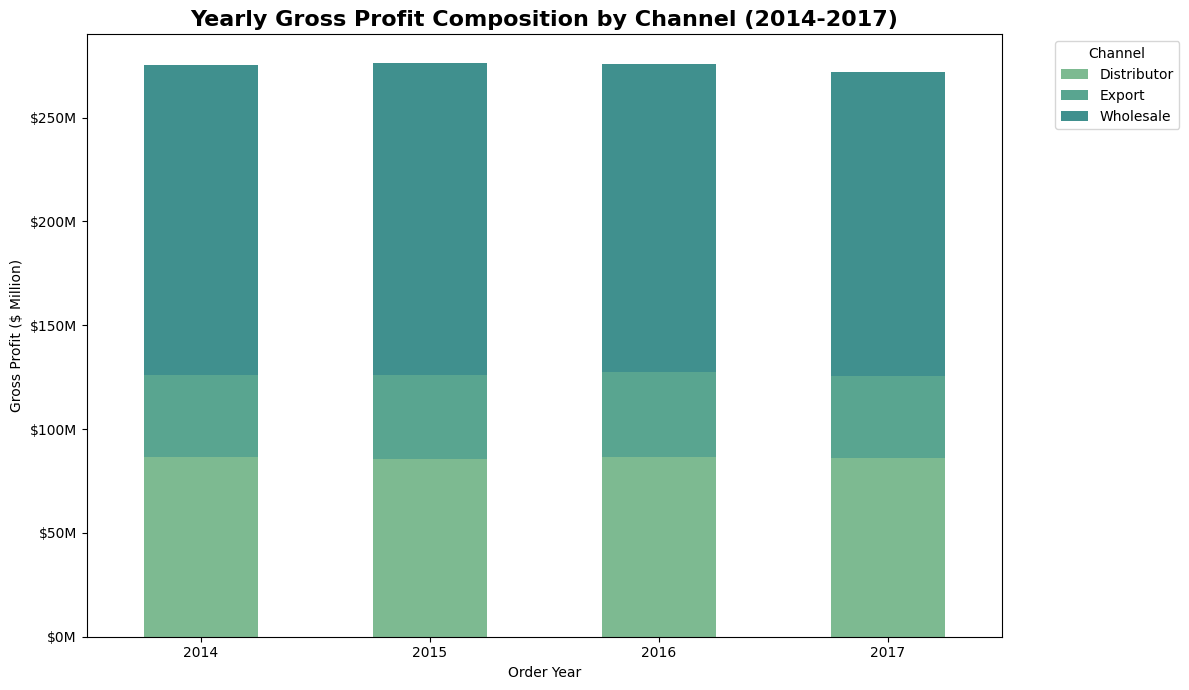

In [70]:
# Create a pivot table without including 2018
channel_year_pivot = merged_df[merged_df['order year'] != 2018].pivot_table(
    values='gross profit',
    index='order year',
    columns='channel',
    aggfunc='sum'
)

# Convert to millions
channel_year_pivot_millions = channel_year_pivot / 1e6

# Plot stacked bar chart
channel_year_pivot_millions.plot(kind='bar', stacked=True, figsize=(12, 7),
                                color=sns.color_palette('crest'))

plt.title('Yearly Gross Profit Composition by Channel (2014-2017)',
          fontsize=16, fontweight='bold')
plt.xlabel('Order Year')
plt.ylabel('Gross Profit (Million $)')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Changed to 0 for better readability

# Format y-axis to show dollar signs and "M"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}M'))

plt.tight_layout()
plt.show()

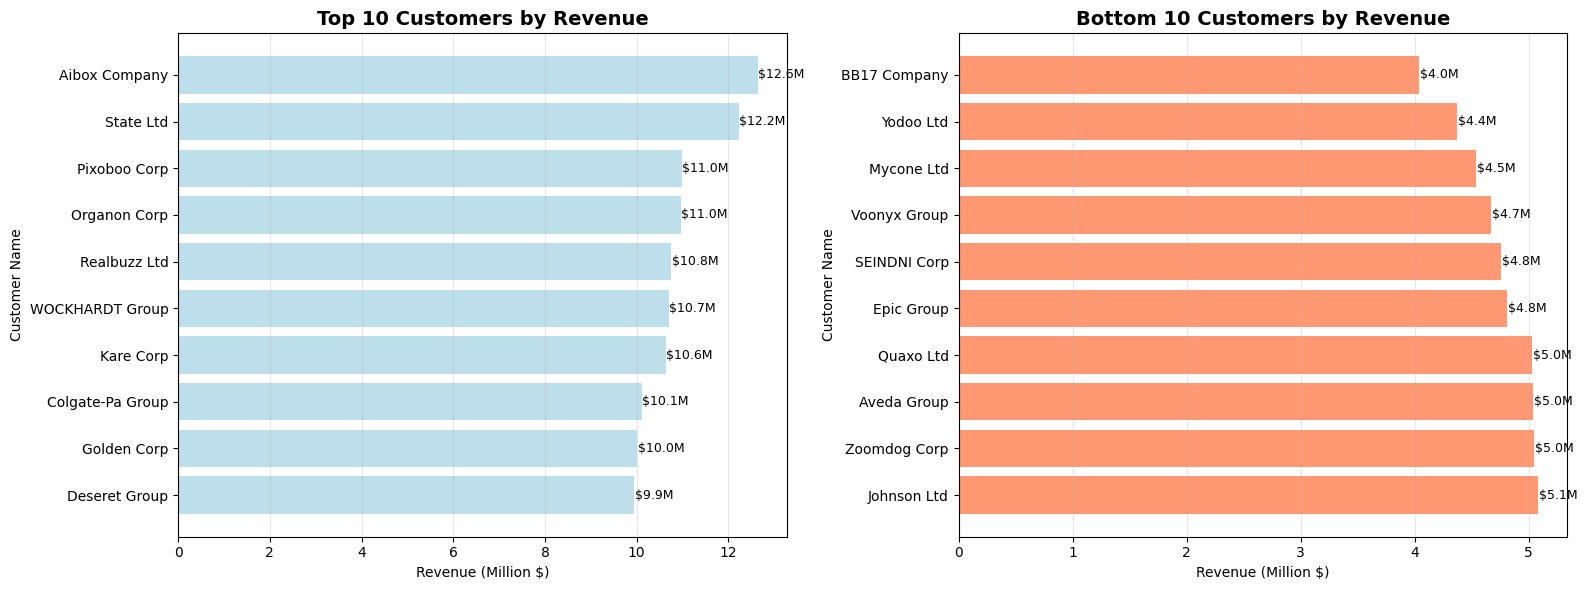

In [60]:
# Calculate revenue for all customers once
customer_revenue = merged_df.groupby('customer names')['line total'].sum()

# Get top and bottom 10 by revenue
top_10 = customer_revenue.nlargest(10).sort_values(ascending=True)  # Top 10 by revenue, ascending
bottom_10 = customer_revenue.nsmallest(10).sort_values(ascending=False)  # Bottom 10 by revenue, descending

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 customers
ax1.barh(top_10.index, top_10.values / 1e6, color='lightblue', alpha=0.8)
ax1.set_title('Top 10 Customers by Revenue', fontsize=14, fontweight='bold')
ax1.set_xlabel('Revenue (Million $)')
ax1.set_ylabel('Customer Name')
ax1.grid(axis='x', alpha=0.3)

# Bottom 10 customers
ax2.barh(bottom_10.index, bottom_10.values / 1e6, color='coral', alpha=0.8)
ax2.set_title('Bottom 10 Customers by Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Revenue (Million $)')
ax2.set_ylabel('Customer Name')
ax2.grid(axis='x', alpha=0.3)

# Add value labels to both plots
for ax, data in [(ax1, top_10), (ax2, bottom_10)]:
    for i, (customer, revenue) in enumerate(data.items()):
        ax.text(revenue/1e6 + 0.01, i, f'${revenue/1e6:.1f}M',
                va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

order year    2014  2015  2016  2017  2018
product name                              
Product 1      722   713   741   616   112
Product 2      762   754   758   765   123
Product 3      646   703   711   642   100
Product 4      696   660   748   674   108
Product 5      822   809   806   792   119
Product 6      530   494   512   513    69
Product 7      257   245   192   240    38
Product 8      244   248   238   232    40
Product 9      181   220   176   194    39
Product 10     200   207   215   207    41


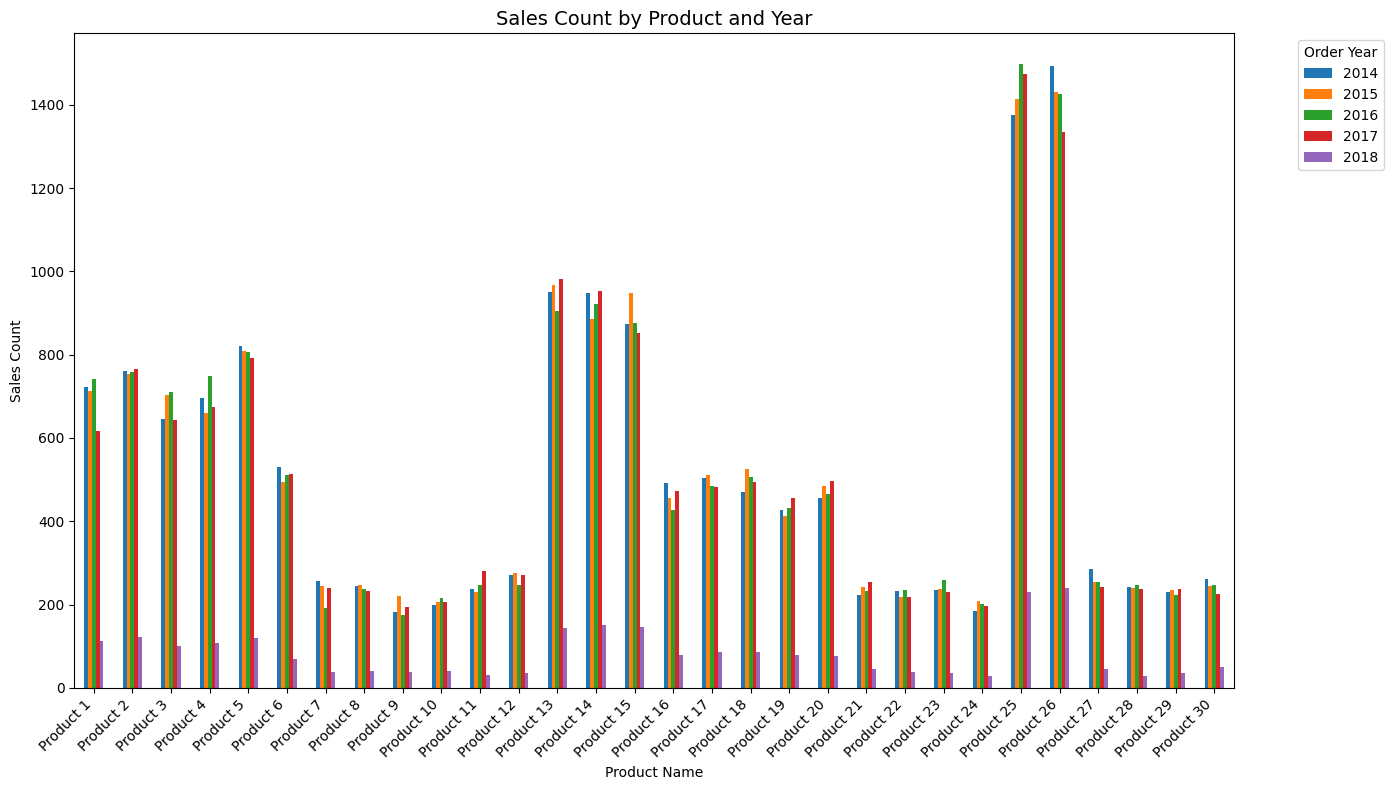

In [69]:
# Aggregate using groupby and unstack
aggregated = merged_df.groupby(['product name', 'order year']).size().unstack(fill_value=0)

# Using pivot_table (more flexible for different aggregations)
aggregated_pivot = merged_df.pivot_table(
    index='product name',
    columns='order year',
    values='ordernumber',
    aggfunc='count',
    fill_value=0
)

# Natural sort
sorted_index = natsorted(aggregated_pivot.index)
aggregated_pivot_sorted = aggregated_pivot.loc[sorted_index]

print(aggregated_pivot_sorted.head(10))

# Plot
aggregated_pivot_sorted.plot(kind='bar', figsize=(14, 8))
plt.title('Sales Count by Product and Year', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Sales Count')
plt.legend(title='Order Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()